<P> <B> <font color=red size="4"> Quantile Regression</Font></B> </P>

Quantile Regression is a type of regression analysis used to estimate the conditional quantiles (e.g., median or other percentiles) of the response variable. Unlike traditional linear regression, which estimates the conditional mean of the response, quantile regression is useful when you are interested in modeling the distribution of the response variable at different quantiles.

<b>Quantile regression is particularly valuable when:</b>

 <ol>  <li> The relationship between predictors and the response is not uniform across the distribution.</li>
  <li>  You want robust regression models that are less sensitive to outliers (e.g., using the median, the 50th quantile).</li></ol>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target


In [4]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]

In [5]:
# Convert to a DataFrame for statsmodels
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y_continuous

In [6]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
# Separate predictors and target
X_train = train_df[wine.feature_names]
y_train = train_df['target']
X_test = test_df[wine.feature_names]
y_test = test_df['target']

In [8]:
# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Add a constant for statsmodels
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

<b>Quantile:</b>

    q=0.5 specifies the median (50th percentile). Adjust q to model other quantiles (e.g., q=0.25 for the 25th percentile or q=0.75 for the 75th percentile).

In [10]:
# Fit a Quantile Regression model for the 50th percentile (median)
quantile = 0.5
model = sm.QuantReg(y_train, X_train_scaled)
result = model.fit(q=quantile)


In [11]:
# Display the summary
print(result.summary())


                         QuantReg Regression Results                          
Dep. Variable:                 target   Pseudo R-squared:               0.6879
Model:                       QuantReg   Bandwidth:                      0.2043
Method:                 Least Squares   Sparsity:                       0.5987
Date:                Sun, 12 Jan 2025   No. Observations:                  142
Time:                        16:37:17   Df Residuals:                      128
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2327      0.025     88.874      0.000       2.183       2.282
x1            -0.0242      0.038     -0.636      0.526      -0.099       0.051
x2             0.0581      0.032      1.819      0.071      -0.005       0.121
x3            -0.0770      0.038     -2.013      0.0

In [12]:
# Make predictions
y_pred_test = result.predict(X_test_scaled)

In [13]:
# Evaluate the model: Mean Absolute Error for Quantile Regression
mae = np.mean(np.abs(y_test - y_pred_test))
print(f"Mean Absolute Error (MAE) for Quantile Regression: {mae:.4f}")

Mean Absolute Error (MAE) for Quantile Regression: 0.2035


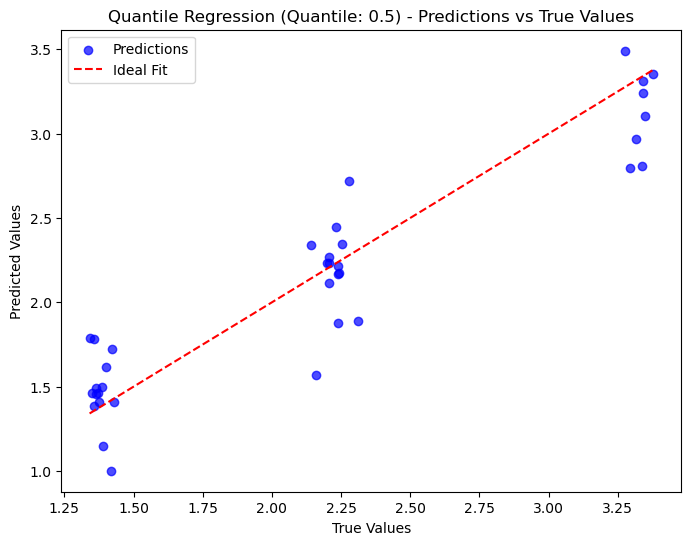

In [14]:
# Visualize predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Quantile Regression (Quantile: {quantile}) - Predictions vs True Values')
plt.legend()
plt.show()

<b>When to Use Quantile Regression:</b>

   <b> <li> Non-Uniform Relationships: </li></b>
        When the relationship between predictors and response varies at different quantiles (e.g., extreme values behave differently than the median).

 <b>   <li>Outlier Sensitivity: </li></b>
        For robust modeling of the median or other quantiles when outliers in the dataset might distort the results of ordinary least squares regression.

 <b>   <li>Distribution Analysis: </li></b>
        When you are interested in understanding the conditional distribution of the response variable (e.g., predicting the lower or upper bounds).